In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt

# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
import io
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset (1).csv


In [ ]:
# Load the data
data = pd.read_csv(io.BytesIO(uploaded['spam_ham_dataset.csv']))

In [ ]:
# Display the summary statistics
display(data.describe())

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
# Print the info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None


In [ ]:
# Print the counts of each category
print(data['label'].value_counts())


ham     3672
spam    1499
Name: label, dtype: int64


In [ ]:
X = data['text']
y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Predict the labels
y_pred = nb.predict(tfidf_test)

In [ ]:
# Print the accuracy score
print("\nAccuracy:", nb.score(tfidf_test, y_test))
print()

#using sklearn.metrics.accuracy_score()
print(accuracy_score(y_test,y_pred))


Accuracy: 0.8714975845410629
0.8714975845410629


In [ ]:
#print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

Confusion Matrix

[[735   0]
 [133 167]]


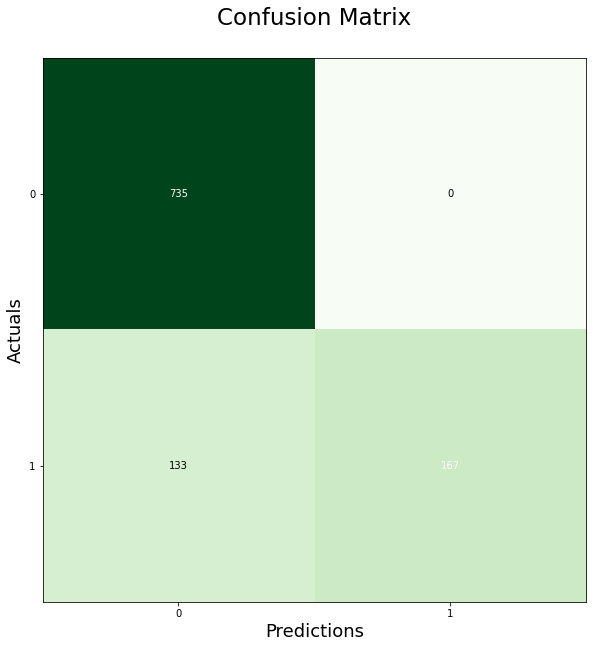

In [ ]:
#plot the confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10, 10), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=23)
plt.show()



In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
# calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
print("accuracy is {} ".format(conf_accuracy) )
print("sensitivity is {}".format(conf_sensitivity))
print("specificity is {}".format(conf_specificity))


True Positives: 167
True Negatives: 735
False Positives: 0
False Negatives: 133
accuracy is 0.8714975845410629 
sensitivity is 0.5566666666666666
specificity is 1.0


In [ ]:
pred_proba = [i[1] for i in nb.predict_proba(tfidf_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': pred_proba})

In [ ]:
thresholds = np.linspace(0, 1 , 200)

# here learning rate is chosen to be 200

In [ ]:
def sensitivity(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return (true_positive / (true_positive + false_negative))


def specificity(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return (true_negative / (true_negative + false_positive))


def accuracy(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return ((true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive))


In [ ]:
#calculate specificity,sensitivity,accuracy values
sensitivity_values = [sensitivity(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
specificity_values = [specificity(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
accuracy_values =    [accuracy(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

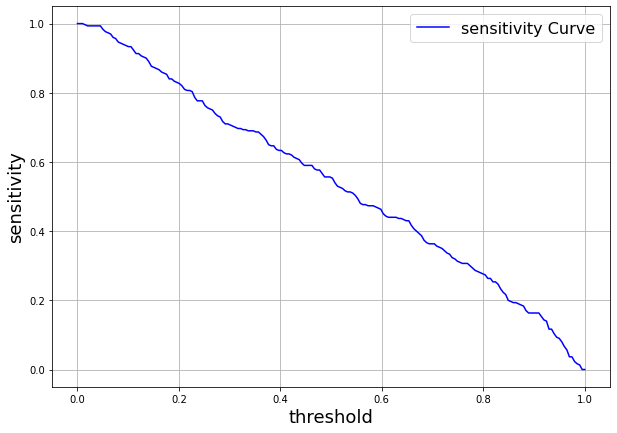

In [ ]:
#plot sensitivity curve
plt.figure(figsize=(10, 7))
plt.ylabel('sensitivity', fontsize=18)
plt.xlabel('threshold', fontsize=18)
plt.plot(thresholds,
         sensitivity_values,
         label='sensitivity Curve',color='b')
plt.grid()
plt.legend(fontsize=16)


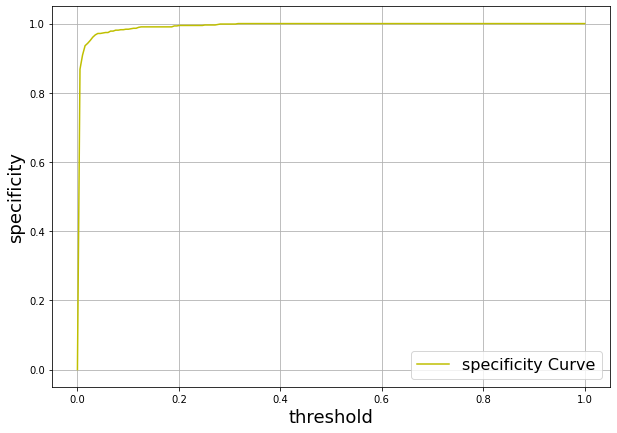

In [ ]:
#plot specificity curve
plt.figure(figsize=(10, 7))
plt.ylabel('specificity', fontsize=18)
plt.xlabel('threshold', fontsize=18)
plt.plot(thresholds,
         specificity_values,
         label='specificity Curve',color='y')
plt.grid()
plt.legend(fontsize=16)


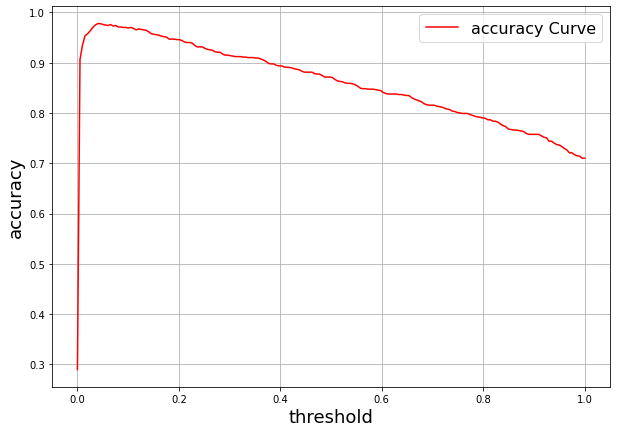

In [ ]:
#plot accuracy curve
plt.figure(figsize=(10, 7))
plt.ylabel('accuracy', fontsize=18)
plt.xlabel('threshold', fontsize=18)
plt.plot(thresholds,
         accuracy_values,
         label='accuracy Curve',color='r')
plt.grid()
plt.legend(fontsize=16)
